In [1]:
import pyscreenshot as ImageGrab
import time

In [ ]:
images_folder="captured_images/3/"
for i in range(0,100):
   time.sleep(8)
   im=ImageGrab.grab(bbox=(60,300,400,600)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

saved...... 0
clear screen now and redraw now........
saved...... 1
clear screen now and redraw now........


In [ ]:
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [11]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
304      3       0       0       0       0       0       0       0       0   
902      9       0       0       0       0       0       0       0       0   
614      6       0       0       0       0       0       0       0       0   
316      3       0       0       0       0       0       0       0       0   
765      7       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
651      6       0       0       0       0       0       0       0       0   
267      2       0       0       0       0       0       0       0       0   
322      3       0       0       0       0       0       0       0       0   
702      7       0       0       0       0       0       0       0       0   
561      5       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64
label
5    100
0    100
9    100
7    100
2    100
3    100
8    100
4    100
6    100
1    100
Name: count, dtype: int64


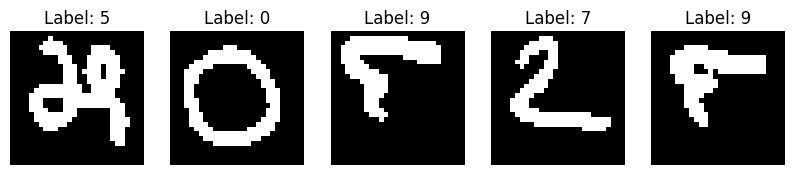

In [2]:
import matplotlib.pyplot as plt

# Check for missing values
print(data.isnull().sum())

# Display the distribution of labels
print(data['label'].value_counts())

# Visualize some examples
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {data.iloc[i, 0]}")
    axes[i].axis('off')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = data.drop(columns='label').values
y = data['label'].values

# Normalize the pixel values
X = X / 255.0

# Reshape if necessary (for neural networks)
X = X.reshape(-1, 28, 28, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (800, 28, 28, 1)
Test data shape: (200, 28, 28, 1)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    # No need to specify input_shape in Conv2D layer
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1300 - loss: 2.3029 - val_accuracy: 0.2750 - val_loss: 2.2968
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2944 - loss: 2.2935 - val_accuracy: 0.1937 - val_loss: 2.2806
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1964 - loss: 2.2725 - val_accuracy: 0.3375 - val_loss: 2.2427
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3074 - loss: 2.2253 - val_accuracy: 0.3625 - val_loss: 2.1636
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3995 - loss: 2.1392 - val_accuracy: 0.4375 - val_loss: 2.0407
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5081 - loss: 2.0171 - val_accuracy: 0.5688 - val_loss: 1.8443
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6642 - loss: 1.7978 - val_accuracy: 0.8250 - val_loss: 1.6072
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8128 - loss: 1.5684 - val_accuracy: 0.8750 - val_loss

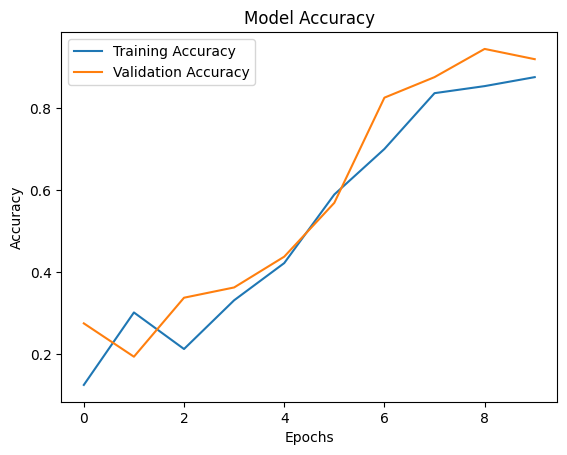

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


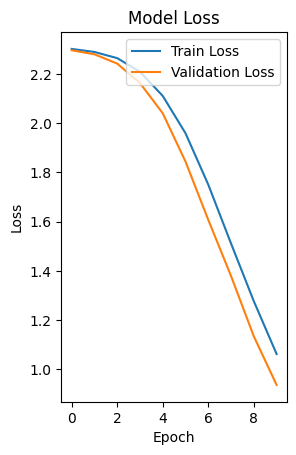

In [16]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8863 - loss: 0.9320 - val_accuracy: 0.9500 - val_loss: 0.7740
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9338 - loss: 0.7945 - val_accuracy: 0.9250 - val_loss: 0.6658
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9018 - loss: 0.6685 - val_accuracy: 0.9500 - val_loss: 0.5529
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9151 - loss: 0.5692 - val_accuracy: 0.9125 - val_loss: 0.4931
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9264 - loss: 0.4925 - val_accuracy: 0.9438 - val_loss: 0.4248
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9326 - loss: 0.4349 - val_accuracy: 0.9500 - val_loss: 0.4027
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9259 - loss: 0.4182 - val_accuracy: 0.9438 - val_loss: 0.3538
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9277 - loss: 0.3614 - val_accuracy: 0.9375 - val_loss:

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9283 - loss: 0.2886 
Test accuracy: 0.9350000023841858


In [10]:
model.save("saved_model.h5")

In [20]:
X = data.drop(["label"],axis=1)
Y= data["label"]

3


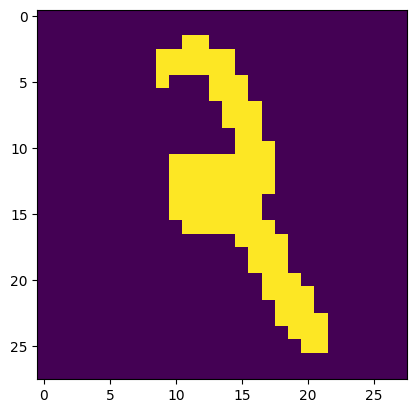

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 379
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

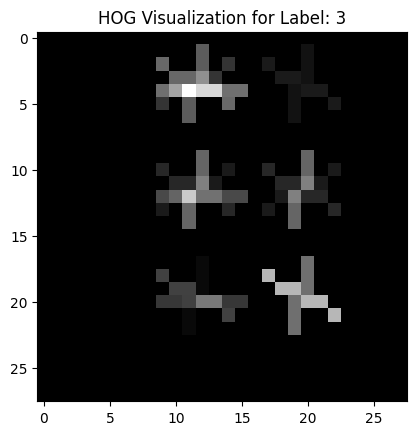

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame
X = data.drop(["label"], axis=1)
Y = data["label"]

# Splitting the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        image = image.reshape(28, 28)
        features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

# Extracting HOG features from training and testing sets
train_x_hog = extract_hog_features(train_x.values)
test_x_hog = extract_hog_features(test_x.values)

# Display HOG of a sample image
idx = 379
sample_image = X.loc[idx].values.reshape(28, 28)
_, hog_image = hog(sample_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_image, cmap='gray')
plt.title(f"HOG Visualization for Label: {Y[idx]}")
plt.show()


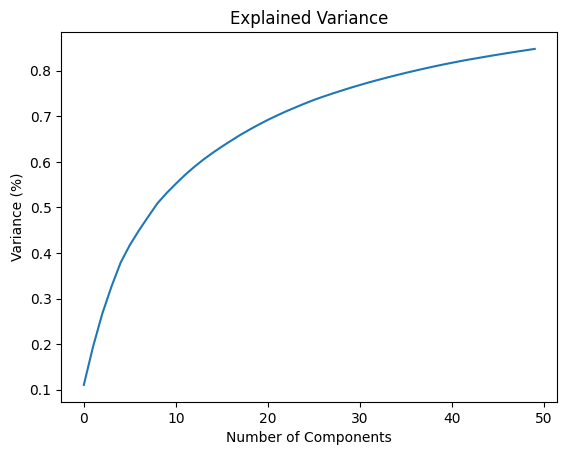

In [24]:
from sklearn.decomposition import PCA

# Assuming 'data' is your DataFrame
X = data.drop(["label"], axis=1)
Y = data["label"]

# Splitting the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Function to apply PCA and reduce dimensions
def apply_pca(images, n_components=50):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(images)
    return principal_components, pca

# Applying PCA to training and testing sets
train_x_pca, pca = apply_pca(train_x.values)
test_x_pca = pca.transform(test_x.values)

# Display cumulative variance ratio to decide number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()


In [26]:
# Extract HOG features
train_x_hog = extract_hog_features(train_x.values)
test_x_hog = extract_hog_features(test_x.values)

# Apply PCA on HOG features
train_x_hog_pca, pca = apply_pca(train_x_hog)
test_x_hog_pca = pca.transform(test_x_hog)


In [27]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [28]:
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming train_x and train_y are your features and labels
# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=6)

# Initialize the classifier
classifier = SVC(kernel="linear", random_state=6)

# Train the classifier
classifier.fit(train_x, train_y)

# Save the model
joblib.dump(classifier, "model/digit_recognizer")

# Make predictions on the test data
pred_y = classifier.predict(test_x)

# Calculate the accuracy
accuracy = accuracy_score(test_y, pred_y)

# Convert accuracy to a percentage
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")


Accuracy: 96.88%


In [29]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))


Accuracy=  0.96875


In [18]:
import joblib
import cv2
import numpy as np
import tkinter as tk
from tkinter import Label, Frame, StringVar
from tkinter import messagebox, ttk, filedialog
from PIL import Image, ImageTk

# Load the trained model
try:
    model = joblib.load("model/digit_recognizer")
except Exception as e:
    messagebox.showerror("Model Load Error", f"Error loading model: {e}")
    exit()

images_folder = "img/"

# Color palette
bg_color = "#f0f0f0"
header_color = "#6200ea"
button_color = "#03dac6"
button_hover_color = "#018786"
text_color = "#ffffff"
result_bg_color = "#ffffff"
result_text_color = "#000000"
border_color = "#6200ea"

# Initialize the main window
root = tk.Tk()
root.title("Digit Recognizer")
root.geometry("500x700")
root.configure(bg=bg_color)

# Create a header label
header_label = Label(root, text="Handwritten Digits Recognition", font=('Algerian', 20, 'bold'), bg=header_color, fg=text_color, pady=20)
header_label.pack(fill=tk.X)

# Create a frame for the controls
control_frame = Frame(root, bg=bg_color)
control_frame.pack(pady=20)

# Create a frame for the result display
display_frame = Frame(root, bg=bg_color, bd=2, relief=tk.RIDGE)
display_frame.pack(pady=10, padx=10, fill=tk.BOTH, expand=True)

# Label to display the captured image
image_label = Label(display_frame, bg=result_bg_color, bd=1, relief=tk.SOLID)
image_label.pack(pady=10, padx=10, fill=tk.BOTH, expand=True)

# Label to display the prediction result
result_label = Label(display_frame, text="Prediction will appear here", font=("Helvetica", 16), bg=result_bg_color, fg=result_text_color, bd=1, relief=tk.SOLID, padx=10, pady=10)
result_label.pack(pady=10, padx=10, fill=tk.BOTH, expand=True)

# Status bar to show recognition status
status_var = StringVar()
status_var.set("Status: Waiting to start...")
status_label = Label(root, textvariable=status_var, font=("Helvetica", 12), bg=bg_color, fg=result_text_color)
status_label.pack(side=tk.BOTTOM, fill=tk.X, pady=10)

running = False

def load_image():
    global running
    running = False
    file_path = filedialog.askopenfilename(initialdir=images_folder, title="Select Image", filetypes=(("PNG Files", "*.png"), ("All Files", "*.*")))
    if file_path:
        recognize_digit(file_path)

def recognize_digit(file_path):
    global running
    running = False
    status_var.set("Status: Recognizing...")
    try:
        im = cv2.imread(file_path)
        if im is None:
            raise ValueError("Failed to load image")

        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

        # Threshold the image
        ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
        roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)
    except Exception as e:
        result_label.config(text=f"Image processing error: {e}", fg="red")
        status_var.set(f"Status: Image processing error")
        return

    # Check if the ROI contains any significant non-zero pixels
    if np.count_nonzero(roi) < 50:
        result_label.config(text="Error: No digit recognized", fg="red")
        status_var.set("Status: No digit recognized")
    else:
        rows, cols = roi.shape
        X = []

        # Fill the data array with pixels one by one
        for i in range(rows):
            for j in range(cols):
                k = roi[i, j]
                if k > 100:
                    k = 1
                else:
                    k = 0
                X.append(k)

        try:
            predictions = model.predict([X])
            prediction_text = f"Prediction: {predictions[0]}"
            result_label.config(text=prediction_text, fg=result_text_color)
            status_var.set(f"Status: Recognized digit {predictions[0]}")

            # Display the image with the prediction
            cv2.putText(im, prediction_text, (20, 20), 0, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
        except Exception as e:
            result_label.config(text=f"Prediction error: {e}", fg="red")
            status_var.set(f"Status: Prediction error")

    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(im_rgb)
    im_tk = ImageTk.PhotoImage(im_pil)
    image_label.config(image=im_tk)
    image_label.image = im_tk

# Button hover effects
def on_enter(e):
    e.widget['background'] = button_hover_color

def on_leave(e):
    e.widget['background'] = button_color

# Load Image and Clear buttons
button_style = {
    "font": ("Helvetica", 16), "bg": button_color, "fg": text_color, 
    "padx": 10, "pady": 5, "bd": 0, "relief": tk.FLAT, 
    "highlightbackground": border_color, "highlightcolor": border_color, 
    "highlightthickness": 2, "borderwidth": 0, "activebackground": button_hover_color,
    "activeforeground": text_color,
    "overrelief": tk.FLAT
}

load_button = tk.Button(control_frame, text="Load Image", command=load_image, **button_style)
load_button.pack(side=tk.LEFT, padx=20)
load_button.bind("<Enter>", on_enter)
load_button.bind("<Leave>", on_leave)

clear_button = tk.Button(control_frame, text="Clear", command=lambda: clear_display(), **button_style)
clear_button.pack(side=tk.LEFT, padx=20)
clear_button.bind("<Enter>", on_enter)
clear_button.bind("<Leave>", on_leave)

def clear_display():
    image_label.config(image='')
    image_label.image = None
    result_label.config(text="Prediction will appear here", fg=result_text_color)
    status_var.set("Status: Cleared")

# Tooltip function
def create_tooltip(widget, text):
    tooltip = tk.Toplevel(widget)
    tooltip.wm_overrideredirect(True)
    tooltip.withdraw()
    label = tk.Label(tooltip, text=text, background="yellow", relief=tk.SOLID, borderwidth=1, font=("Helvetica", 12))
    label.pack()

    def enter(event):
        x = event.x_root + 20
        y = event.y_root + 20
        tooltip.wm_geometry(f"+{x}+{y}")
        tooltip.deiconify()

    def leave(event):
        tooltip.withdraw()

    widget.bind("<Enter>", enter)
    widget.bind("<Leave>", leave)

create_tooltip(load_button, "Load an image from the dataset")
create_tooltip(clear_button, "Clear the display")

root.mainloop()
